In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
dataset = pd.read_csv('train.csv')

In [4]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
dataset.shape

(891, 12)

In [7]:
dataset = dataset.drop(['Cabin'], axis=1)

In [8]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [9]:
# fill the empty rows with the mean value 

In [10]:
dataset = dataset.fillna(dataset.mean())

In [11]:
#making sure we have no null
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [12]:
#drop the 2 categorical rows values 
dataset = dataset.dropna()

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [14]:
# Doing some visualization to the data

<AxesSubplot:xlabel='Age', ylabel='Survived'>

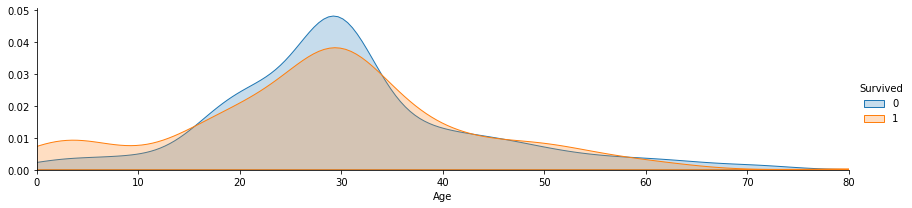

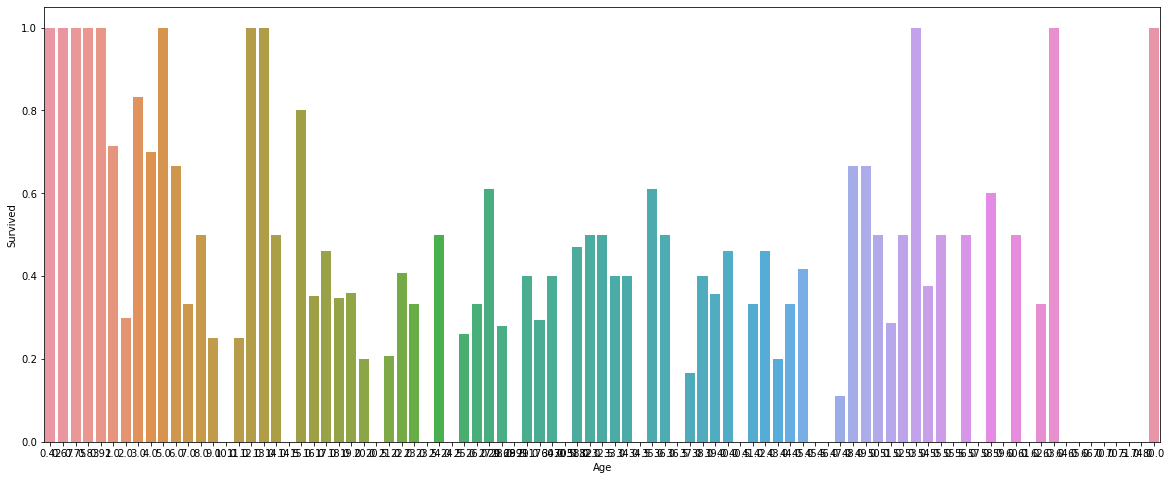

In [15]:
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, dataset['Age'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(20,8))
average_age = dataset[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

In [16]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

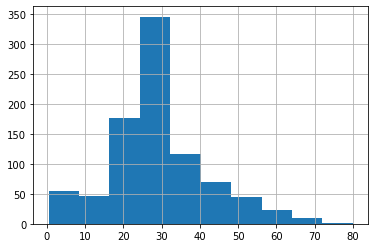

In [17]:
dataset['Age'].hist()

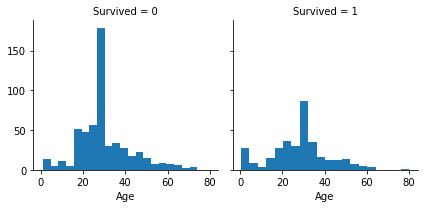

In [18]:
g = sns.FacetGrid(dataset, col='Survived')
g.map(plt.hist, 'Age', bins=20)

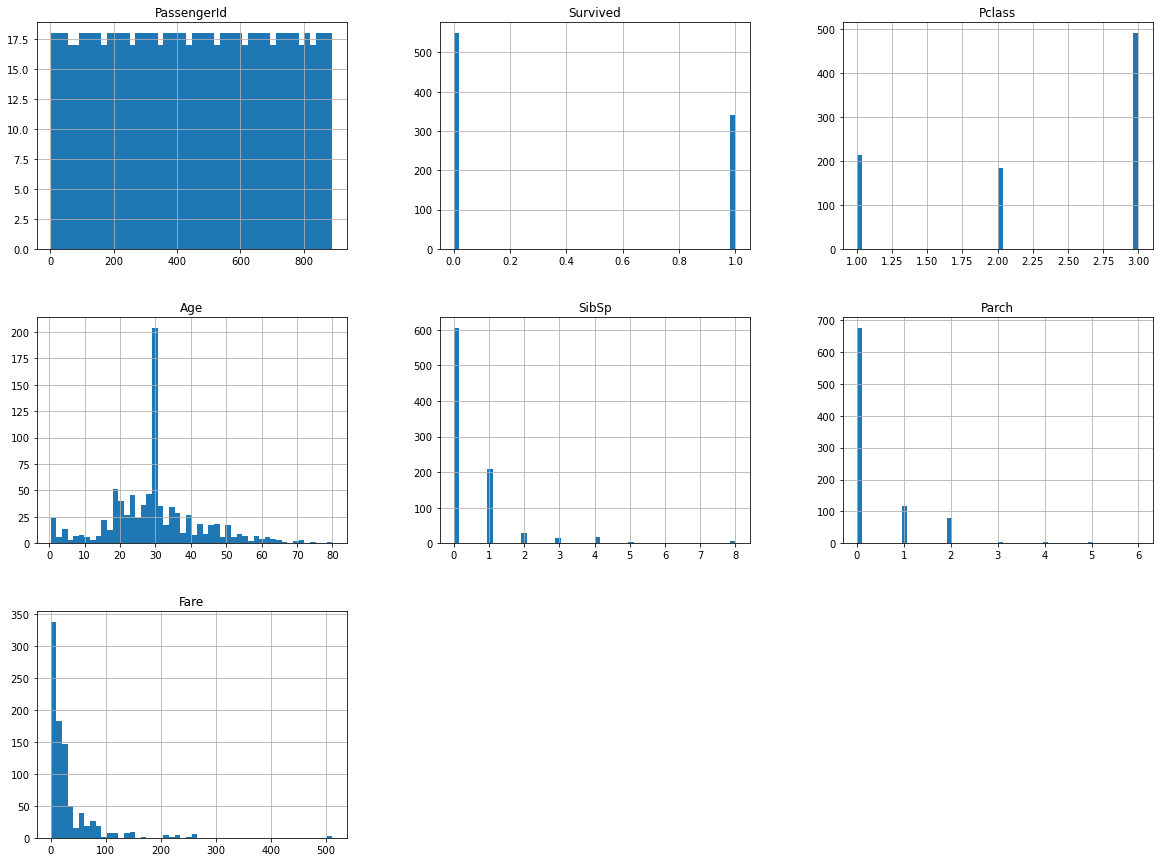

In [19]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [20]:
dataset[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.740385
1,male,0.188908


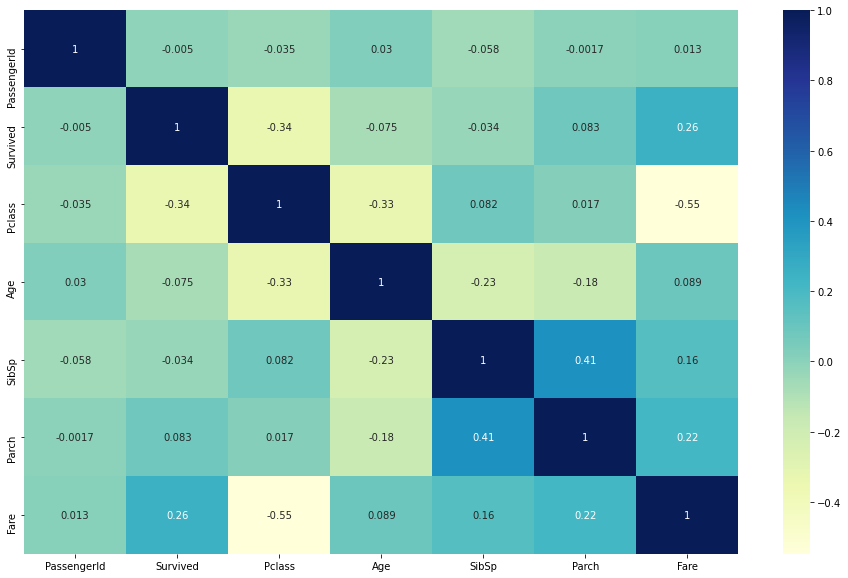

In [21]:
plt.figure(figsize = (16, 10))
sns.heatmap(dataset.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [22]:
#lets transform categorical data

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Sex'] = le.fit_transform(dataset['Sex'])

In [24]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [25]:
X = dataset.drop(['PassengerId','Survived','Name','Ticket'], axis=1)
Y = dataset.iloc[:,1]

In [26]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare Embarked
0         3    1  22.000000      1      0   7.2500        S
1         1    0  38.000000      1      0  71.2833        C
2         3    0  26.000000      0      0   7.9250        S
3         1    0  35.000000      1      0  53.1000        S
4         3    1  35.000000      0      0   8.0500        S
..      ...  ...        ...    ...    ...      ...      ...
886       2    1  27.000000      0      0  13.0000        S
887       1    0  19.000000      0      0  30.0000        S
888       3    0  29.699118      1      2  23.4500        S
889       1    1  26.000000      0      0  30.0000        C
890       3    1  32.000000      0      0   7.7500        Q

[889 rows x 7 columns]


In [27]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


In [28]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6])], remainder='passthrough')
X = ct.fit_transform(X)

In [30]:
print(X)

[[ 0.      0.      1.     ...  1.      0.      7.25  ]
 [ 1.      0.      0.     ...  1.      0.     71.2833]
 [ 0.      0.      1.     ...  0.      0.      7.925 ]
 ...
 [ 0.      0.      1.     ...  1.      2.     23.45  ]
 [ 1.      0.      0.     ...  0.      0.     30.    ]
 [ 0.      1.      0.     ...  0.      0.      7.75  ]]


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [32]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
logreg.score(X_train, Y_train)

C:\Users\LEN0VO_2021\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7974683544303798

In [33]:
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X_train, Y_train, cv=3, scoring="accuracy")

C:\Users\LEN0VO_2021\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LEN0VO_2021\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

array([0.79746835, 0.80590717, 0.7721519 ])

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_logreg = confusion_matrix(Y_test, Y_pred)
print(cm_logreg)
accuracy_score(Y_test, Y_pred)

[[91 14]
 [16 57]]


0.8314606741573034

In [78]:
#testing the model
print(logreg.predict(([[0,0,0,1,22,0,1,0,40]])))

[0]


In [40]:
from sklearn.metrics import roc_auc_score , auc
roc_auc_score(Y_test,Y_pred)

0.8237442922374429

In [41]:
roc_auc = auc(fpr, tpr)

In [42]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

Text(0.5, 0, 'False Positive Rate')

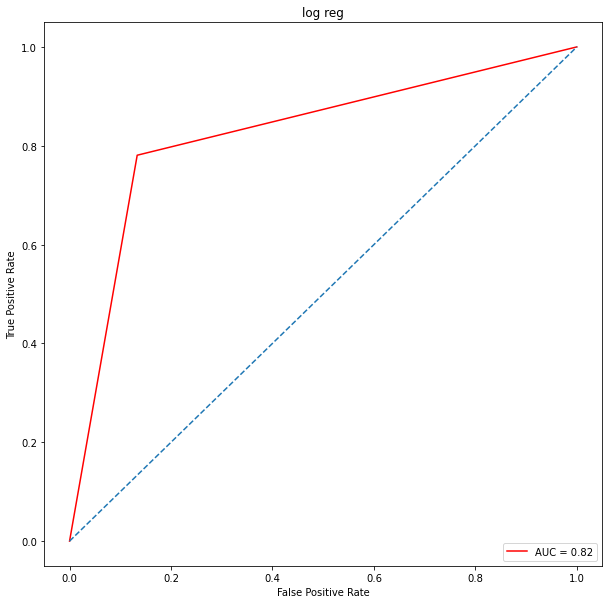

In [44]:
plt.figure(figsize=(10,10))
plt.title('log reg')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [46]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)


0.9873417721518988

In [52]:
cm_rf = confusion_matrix(Y_test, Y_pred)
print(cm_rf)
accuracy_score(Y_test, Y_pred)

[[95 10]
 [23 50]]


0.8146067415730337

In [53]:
from sklearn.metrics import roc_auc_score , auc
roc_auc_score(Y_test,Y_pred)

0.7948467058056099

In [55]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds1 = roc_curve(Y_test, Y_pred)

In [56]:
roc_auc = auc(fpr1, tpr1)

In [62]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

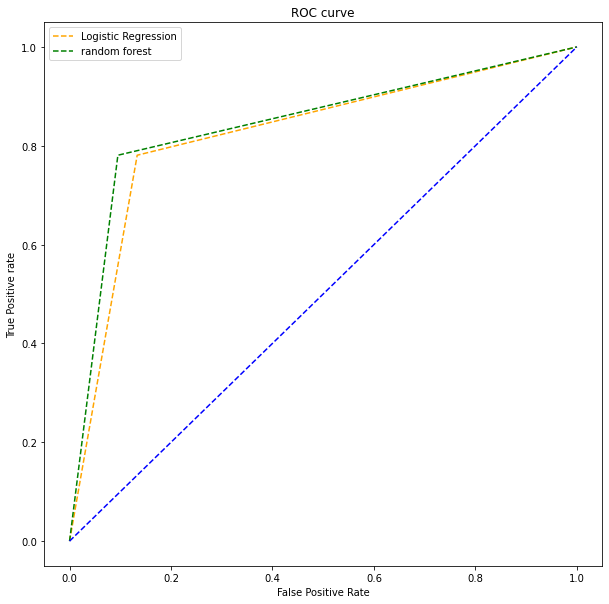

In [68]:
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr1, tpr, linestyle='--',color='green', label='random forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [69]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [70]:
Y_pred = svm_classifier.predict(X_test)
svm_classifier.score(X_train, Y_train)

0.7749648382559775

In [71]:
cm_svm = confusion_matrix(Y_test, Y_pred)
print(cm_svm)
accuracy_score(Y_test, Y_pred)

[[93 12]
 [18 55]]


0.8314606741573034

In [72]:
roc_auc_score(Y_test,Y_pred)

0.8195694716242661

In [79]:
from sklearn.naive_bayes import GaussianNB
NV_classifier = GaussianNB()
NV_classifier.fit(X_train, Y_train)

GaussianNB()

In [80]:
Y_pred = NV_classifier.predict(X_test)
NV_classifier.score(X_train, Y_train)

0.7834036568213784

In [81]:
cm_NV = confusion_matrix(Y_test, Y_pred)
print(cm_NV)
accuracy_score(Y_test, Y_pred)

[[87 18]
 [20 53]]


0.7865168539325843

In [82]:
roc_auc_score(Y_test,Y_pred)

0.7772994129158513

In [83]:
#best calssifier so far on testing score was log reg with 83%